<a href="https://colab.research.google.com/github/ChapelFob80930/Segmentation-and-Classification-of-Brain-Tumor-MRI-Images/blob/main/Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')   # run this if you haven't already


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATASET_FOLDER = "/content/drive/MyDrive/Brain Tumor Dataset/DATASET/Segmentation"

In [ ]:
import os

In [ ]:
os.listdir(DATASET_FOLDER)

['Pituitary tumor', 'Glioma', 'Meningioma']

In [ ]:
# os.listdir(DATASET_FOLDER+"/Segmentation")

In [ ]:
# sorted(os.listdir(DATASET_FOLDER+"/Glioma"))

In [ ]:
import re

data = []
mask = []

In [ ]:
for f in sorted(os.listdir(DATASET_FOLDER+"/Glioma")):
  if re.search(r'_mask.png', f):
    mask.append(f)
  else:
    data.append(f)

In [ ]:
for f in sorted(os.listdir(DATASET_FOLDER+"/Meningioma")):
  if re.search(r'_mask.png', f):
    mask.append(f)
  else:
    data.append(f)

In [ ]:
for f in sorted(os.listdir(DATASET_FOLDER+"/Pituitary tumor")):
  if re.search(r'_mask.png', f):
    mask.append(f)
  else:
    data.append(f)

In [ ]:
data[10]

'enh_1851.png'

In [ ]:
mask[10]

'enh_1851_mask.png'

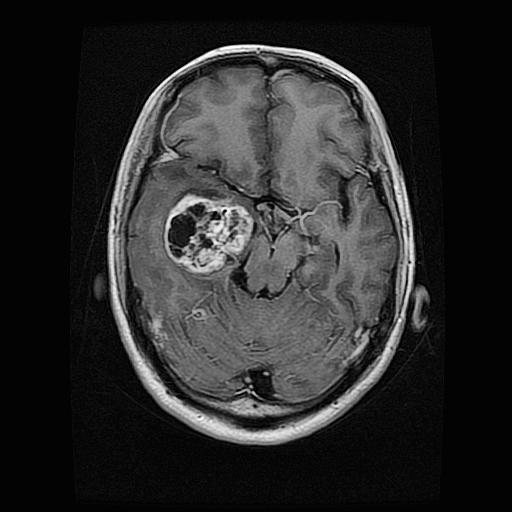

In [ ]:
from PIL import Image

Image.open(DATASET_FOLDER+"/Glioma/"+data[0])

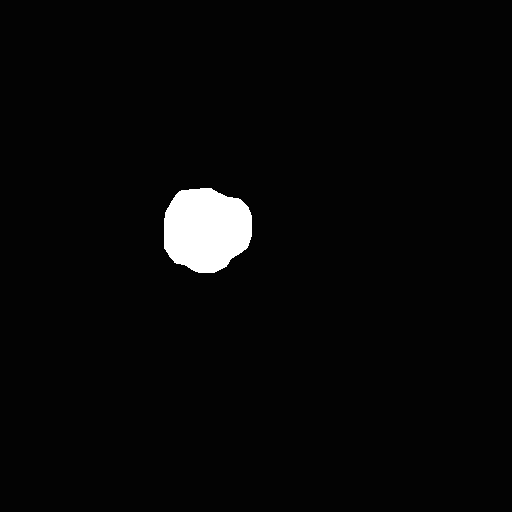

In [ ]:
Image.open(DATASET_FOLDER+"/Glioma/"+mask[0])

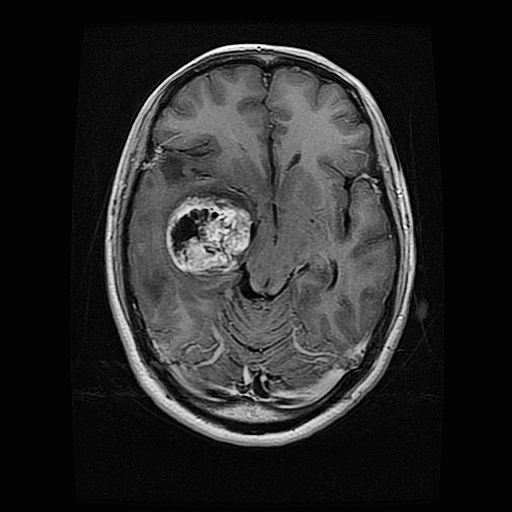

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

data_path =  DATASET_FOLDER + "/Glioma/" + data[1]


cv2_imshow(cv2.imread(data_path))

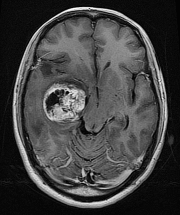

In [ ]:
cv2_imshow(cv2.resize(cv2.imread(data_path), (256, 256))[15:230, 40:220])

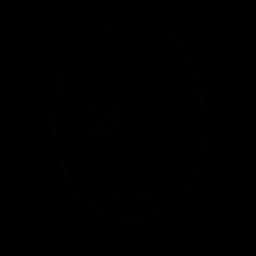

In [ ]:
img = cv2.resize(cv2.imread(data_path), (256, 256), cv2.IMREAD_GRAYSCALE)
img = img.astype('float32')
img = (img - img.mean()) / (img.std() + 1e-8)
cv2_imshow(img)

# **Testing out Applying the Mask (what we should be looking at after everything is done)**

In [ ]:
image = cv2.imread(DATASET_FOLDER+"/Glioma/"+data[0])
mask_ = cv2.imread(DATASET_FOLDER+"/Glioma/"+mask[0])

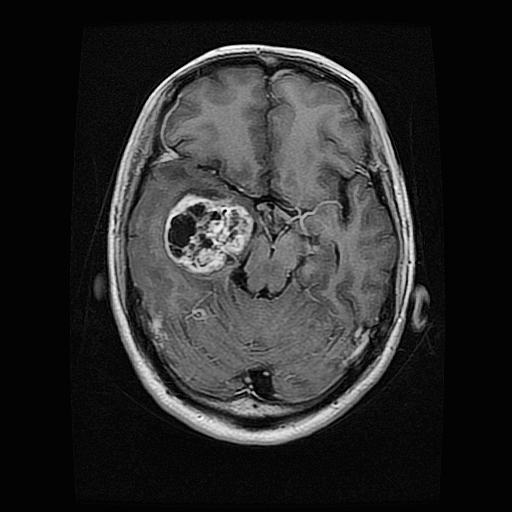

In [ ]:
cv2_imshow(image)

In [ ]:
print(image.shape)
print(mask_.shape)

(512, 512, 3)
(512, 512, 3)


In [ ]:
def apply_mask(image, mask_, alpha=0.6):
  img = image.astype('float32')
  mask = mask_.astype('float32')

  beta = 1- alpha
  gamma = 0
  overlay = cv2.addWeighted(img, alpha, mask, beta, gamma)

  return overlay.astype('uint8')


Text(0.5, 1.0, 'Glioma')

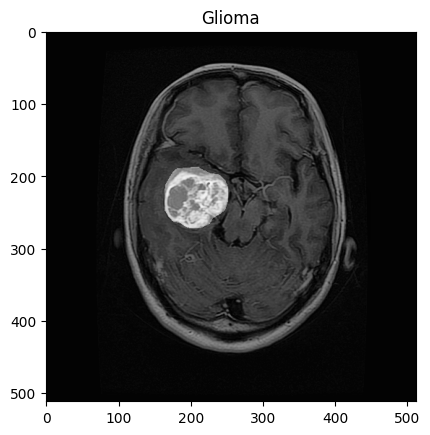

In [ ]:
import matplotlib.pyplot as plt

img = apply_mask(image, mask_)
# cv2_imshow("Glioma",img)
# print("                              Glioma")
plt.imshow(img)
plt.title("Glioma")

# **Preprocessing for Segmentation**



In [ ]:
## Note run only at the beginning of preprocessing else chud gaye

import shutil

if os.path.exists("preprocessed_data"):
  shutil.rmtree("preprocessed_data")
  os.mkdir("preprocessed_data")
  # os.mkdir("preprocessed_data/Glioma")
  # os.mkdir("preprocessed_data/Glioma/images")
  # os.mkdir("preprocessed_data/Glioma/masks")
  # os.mkdir("preprocessed_data/Meningioma")
  # os.mkdir("preprocessed_data/Meningioma/images")
  # os.mkdir("preprocessed_data/Meningioma/masks")
  # os.mkdir("preprocessed_data/Pituitary tumor")
  # os.mkdir("preprocessed_data/Pituitary tumor/images")
  # os.mkdir("preprocessed_data/Pituitary tumor/masks")
  os.mkdir("preprocessed_data/images")
  os.mkdir("preprocessed_data/masks")
else:
  os.mkdir("preprocessed_data")
  # os.mkdir("preprocessed_data/Glioma")
  # os.mkdir("preprocessed_data/Glioma/images")
  # os.mkdir("preprocessed_data/Glioma/masks")
  # os.mkdir("preprocessed_data/Meningioma")
  # os.mkdir("preprocessed_data/Meningioma/images")
  # os.mkdir("preprocessed_data/Meningioma/masks")
  # os.mkdir("preprocessed_data/Pituitary tumor")
  # os.mkdir("preprocessed_data/Pituitary tumor/images")
  # os.mkdir("preprocessed_data/Pituitary tumor/masks")
  os.mkdir("preprocessed_data/images")
  os.mkdir("preprocessed_data/masks")

In [ ]:
# os.mkdir("preprocessed_data")
# os.mkdir("preprocessed_data/Glioma")
# os.mkdir("preprocessed_data/Meningioma")
# os.mkdir("preprocessed_data/Pituitary tumor")

In [ ]:
for f in os.listdir(DATASET_FOLDER):
  # j=0
  for i in sorted(os.listdir(DATASET_FOLDER+"/"+f)):
    # cv2.resize(cv2.imread(data_path), (256, 256), interpolation=cv2.INTER_LINEAR)
    if re.search(r'_mask.png', i):
      img = cv2.imread(DATASET_FOLDER+"/"+f+"/"+i, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_LINEAR)
      # img = (img > 127).astype('uint8')
      # cv2.imwrite("preprocessed_data/"+f+"/"+f+f"_{j}_mask.png", img)
      # cv2.imwrite("preprocessed_data/"+f+"/"+"masks/"+i, img)
      cv2.imwrite("preprocessed_data/masks/"+re.sub("_mask",'',i),img)

    else:
      img = cv2.imread(DATASET_FOLDER+"/"+f+"/"+i, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_LINEAR)
      # img = img.astype('float32')
      # img = (img - img.mean()) / (img.std() + 1e-8)
      # cv2.imwrite("preprocessed_data/"+f+"/"+f+f"_{j}.png", img)
      # cv2.imwrite("preprocessed_data/"+f+"/"+"images/"+i, img)
      cv2.imwrite("preprocessed_data/images/"+i,img)

    # cv2.imwrite("preprocessed_data/"+f+"/"+i, img)

    # j+=1


In [ ]:
import os
import re

img_dir = "preprocessed_data/images/"
mask_dir = "preprocessed_data/masks/"

img_files = set(os.listdir(img_dir))
mask_files = set(os.listdir(mask_dir))


base_imgs = {os.path.splitext(f)[0] for f in img_files}
base_masks = {re.sub(r'_mask','',os.path.splitext(f)[0]) for f in mask_files}

print("Total images:", len(base_imgs))
print("Total masks:", len(base_masks))


no_mask = base_imgs - base_masks
print("Images without mask:", len(no_mask))
print(list(no_mask)[:10])

no_img = base_masks - base_imgs
print("Masks without image:", len(no_img))
print(list(no_img)[:10])



Total images: 2192
Total masks: 2192
Images without mask: 0
[]
Masks without image: 0
[]


In [ ]:
import shutil

out_img_dir = "preprocessed_data/images_filtered/"

if no_mask==[] or no_img==[]:

  os.makedirs(out_img_dir, exist_ok=True)

  for fname in os.listdir(img_dir):
      base = os.path.splitext(fname)[0]
      if base in base_masks:  # only keep if mask exists
        shutil.copy(os.path.join(img_dir, fname),
                      os.path.join(out_img_dir, fname))

  print("Filtered images copied to", out_img_dir)

else:
  if os.path.exists(out_img_dir):
    shutil.rmtree(out_img_dir)




In [ ]:
import tensorflow as tf

def load_and_preprocess_image_mask(image_path, mask_path, target_size=(256, 256)):
    # Load image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, target_size)

    # Load mask
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.convert_image_dtype(mask, tf.float32)
    mask = tf.image.resize(mask, target_size, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR) # Use nearest neighbor for masks

    # Normalize image to [0, 1]
    image = image / 255.0
    mask = mask/255.0

    return image, mask

In [ ]:
import os

image_dir = 'preprocessed_data/images'
mask_dir = 'preprocessed_data/masks'

image_filenames = sorted([os.path.join(image_dir, fname) for fname in os.listdir(image_dir) if fname.endswith('.png')])
mask_filenames = sorted([os.path.join(mask_dir, fname) for fname in os.listdir(mask_dir) if fname.endswith('.png')])

assert len(image_filenames) == len(mask_filenames), "Number of images and masks must match."

In [ ]:
# image_filenames[:10]

In [ ]:
# mask_filenames[:10]

In [ ]:
# mask_filenames.count('preprocessed_data/masks/enh_1_mask.png')

In [ ]:
# cv2.imread("/content/preprocessed_data/images/enh_1.png")

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((image_filenames, mask_filenames))
dataset = dataset.map(load_and_preprocess_image_mask, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
BUFFER_SIZE = 1000 # For shuffling
BATCH_SIZE = 32

dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
for x,y in dataset.take(1):
  print(x.shape)
  print(y.shape)
  print(np.min(x))
  print(np.max(x))
  print(np.min(y))
  print(np.max(y))

(32, 256, 256, 3)
(32, 256, 256, 1)
1.5378702e-05
0.003921569
4.6136105e-05
0.003921569


# **Preprocessing for Classification**

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
CLASSIFICATION_FOLDER = "/content/drive/MyDrive/Brain Tumor Dataset/DATASET/classification/Training"

In [ ]:
# # data = tf.keras.utils.get_file(DATASET_FOLDER)
# data = tf.keras.utils.image_dataset_from_directory(CLASSIFICATION_FOLDER)

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    CLASSIFICATION_FOLDER,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(256, 256),
    batch_size=32
  )

Found 5712 files belonging to 4 classes.
Using 4570 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    CLASSIFICATION_FOLDER,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

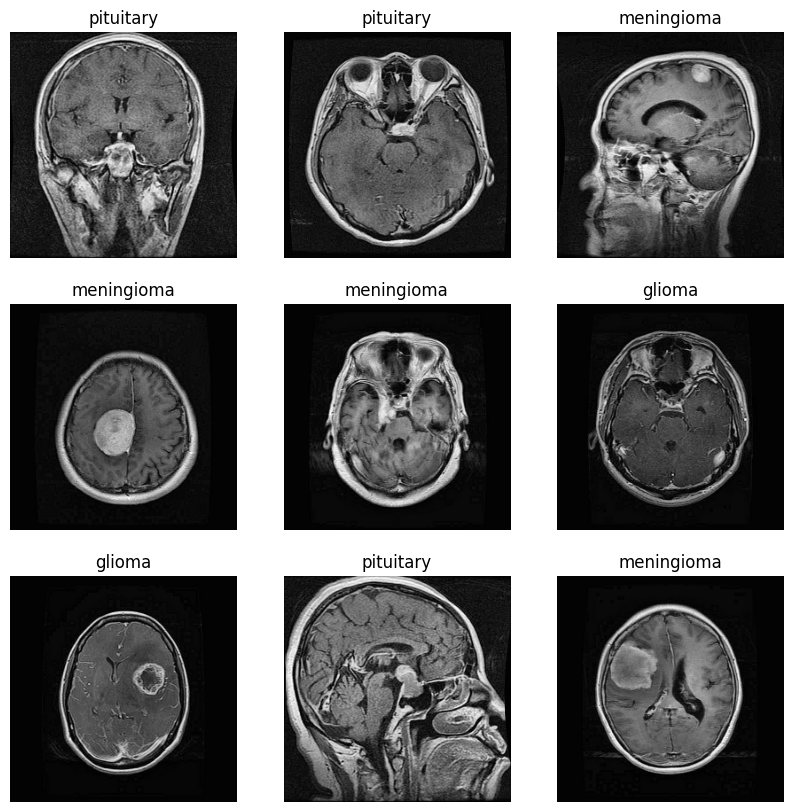

In [ ]:
plt.figure(figsize = (10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# **Building the Model**